# Simulating the acceleration of a charged particle in a Cyclotron
#### Note: Extension of Computer Homework 7

## *Physics Python Project*

In [393]:
import numpy as np                         # numpy is a library that includes most of the numerical functions
import matplotlib.pyplot as plt            # this is the library we use to plot   
from mpl_toolkits.mplot3d import Axes3D 

In [394]:
def calc_force_on_charge_by_efield(electric_field, q = 1.67E-19) :
    force = q*electric_field
    return force

def calc_force_on_charge_by_bfield(magnetic_field, charge_velocity, q = 1.67E-19) :
    force = q*np.cross(charge_velocity, magnetic_field)
    return force

In [395]:
def calc_acceleration_of_charge_in_ebfields(electric_field, magnetic_field, charge_position, charge_velocity, q, m) :
    ''' Calculate the acceleration of a charge in both electric and magnetic fields '''
    
    if charge_position[0] > 0 or charge_position[0] <= -gap:
        a = q*(np.cross(charge_velocity,magnetic_field))/m
        a = calc_force_on_charge_by_bfield(magnetic_field, charge_velocity, q)/m
    else: 
        a = q*electric_field
        a = calc_force_on_charge_by_efield(electric_field,q)/m
        if charge_position[1] > 0:
            a = -a
    return a

In [396]:
def constant_electric_x_field(charge_position) :
    ''' This creates a field as $\vec{E} = [5000000, 0, 0]$'''
    return np.array([5000000.0,0.0,0.0])

def constant_magnetic_z_field(charge_position) :
    ''' This creates a field as $\vec{B} = [0, 0, -2]$'''
    return np.array([0,0,-2])

In [397]:
def get_updated_value(current_value, rate_of_change, dt) :
    updated_value = current_value+rate_of_change*dt
    return updated_value

In [398]:
def get_rates_of_change_euler(particle_position, particle_velocity, electric_field_function,
                                        magnetic_field_function, q, m, dt) :
    
    electric_field_at_position = electric_field_function(particle_position)
    magnetic_field_at_position = magnetic_field_function(particle_position)
    
    particle_acceleration = calc_acceleration_of_charge_in_ebfields(electric_field_at_position, 
                                                                    magnetic_field_at_position, 
                                                                    particle_position, particle_velocity, q, m)
    return particle_velocity, particle_acceleration

In [399]:
c = 3.0E08
initial_position = np.array([0,0,0])
initial_velocity = np.array([0.05*c,0,0])
gap = 0.1

timesteps = np.arange(0, 4.0E-7, 1.6E-10)
timesteps.shape

position_evolution = np.zeros((timesteps.size,3))
position_evolution.shape

(2500, 3)

In [400]:
def create_place_holder_array(timesteps) :
    ''' Returns a placeholder array '''

    return np.zeros((timesteps.size,3))

In [401]:
def calc_trajectory_in_fields(electric_field_function, magnetic_field_function, get_rates_of_change_function, 
                              timesteps, particle_position, particle_velocity, q = 1.67E-19, m = 1.67E-27) :
    
    # Create place holder arrays
    position_evolution = create_place_holder_array(timesteps)
    velocity_evolution = create_place_holder_array(timesteps)
    
    dt = timesteps[1] 
    for inum, timestep in enumerate(timesteps) :
        # Populate
        position_evolution[inum,:] = particle_position
        velocity_evolution[inum,:] = particle_velocity
        
        # Calculate velocity and acceleration due to e- and b-fields to update particle_position and particle_velocity
        position_rate_of_change, velocity_rate_of_change = \
            get_rates_of_change_function(particle_position, particle_velocity, electric_field_function,
                                        magnetic_field_function, q, m, dt)
        
        # Update
        particle_position = get_updated_value(particle_position, position_rate_of_change, dt)
        particle_velocity = get_updated_value(particle_velocity, velocity_rate_of_change, dt)
        
    return position_evolution, velocity_evolution

In [402]:
trajectory_evolution, velocity_evolution = calc_trajectory_in_fields(constant_electric_x_field, 
                                                                     constant_magnetic_z_field,
                                                                     get_rates_of_change_euler, 
                                                                     timesteps, initial_position, initial_velocity)

In [403]:
def get_rates_of_change_runge_kutta(particle_position, particle_velocity, electric_field_function,
                                        magnetic_field_function, q, m, dt) :
    

    current_velocity, current_acceleration = get_rates_of_change_euler(particle_position, particle_velocity, 
                                                                       electric_field_function, 
                                                                       magnetic_field_function, q, m, dt)
    
    mid_particle_velocity = current_velocity + current_acceleration * dt/2
    mid_particle_position = particle_position + mid_particle_velocity * dt/2
    
    # Calculate the acceleration due to the electric and magnetic fields at the mid_particle_position
    runge_kutta_velocity, runge_kutta_acceleration = get_rates_of_change_euler(mid_particle_position, 
                                                                               mid_particle_velocity, 
                                                                               electric_field_function, 
                                                                               magnetic_field_function, q, m, dt)
    return runge_kutta_velocity, runge_kutta_acceleration

In [404]:
trajectory_evolution_2, velocity_evolution_2 = calc_trajectory_in_fields(constant_electric_x_field, 
                                                                     constant_magnetic_x_field,
                                                                     get_rates_of_change_runge_kutta, 
                                                                     timesteps, initial_position, initial_velocity)

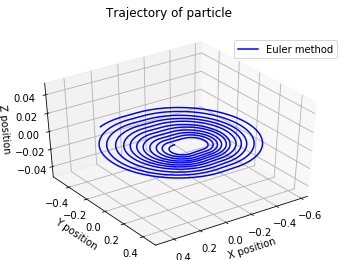

In [405]:
fig = plt.figure()
ax = plt.gca(projection = '3d')
ax.view_init(40,55)
ax.plot(trajectory_evolution[:,0], trajectory_evolution[:,1], trajectory_evolution[:,2], color = 'b', 
        label = 'Euler method')

ax.set_xlabel('X position')
ax.set_ylabel('Y position')
ax.set_zlabel('Z position')
fig.suptitle('Trajectory of particle')
ax.legend()

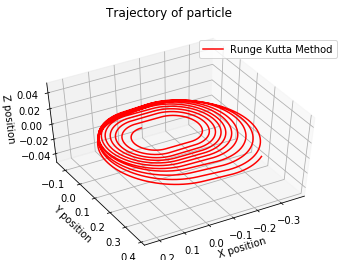

In [406]:
fig = plt.figure()
ax = plt.gca(projection = '3d')
ax.view_init(50,60)
ax.plot(trajectory_evolution_2[:,0], trajectory_evolution_2[:,1], trajectory_evolution_2[:,2], color = 'r', 
       label = 'Runge Kutta Method')

ax.set_xlabel('X position')
ax.set_ylabel('Y position')
ax.set_zlabel('Z position')
fig.suptitle('Trajectory of particle')
ax.legend()

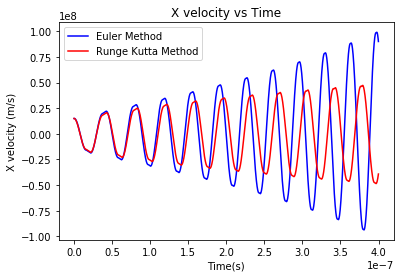

In [407]:
plt.plot(timesteps, velocity_evolution[:,0], color = 'b', label = 'Euler Method')
plt.plot(timesteps, velocity_evolution_2[:,0], color = 'r', label = 'Runge Kutta Method')

plt.xlabel('Time(s)')
plt.ylabel('X velocity (m/s)')
plt.title('X velocity vs Time')
plt.legend()

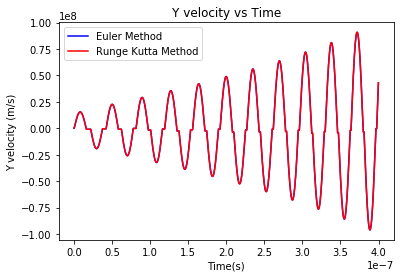

In [408]:
plt.plot(timesteps, velocity_evolution[:,1], color = 'b', label = 'Euler Method')
plt.plot(timesteps, velocity_evolution[:,1], color = 'r', label = 'Runge Kutta Method')

plt.xlabel('Time(s)')
plt.ylabel('Y velocity (m/s)')
plt.title('Y velocity vs Time')
plt.legend()